# **Homework 4**

Student :- Gauri Damle\
NUID :- NU002931881


## Importing Modules

In [1]:
#import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d


#Preprocessing methods
from sklearn.preprocessing import StandardScaler
#Split the training and test dataset
from sklearn.model_selection import train_test_split


## Logistic regression is designed for binary classification, To perform multiclass classification using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Input Data

The data is sourced from study of Abalone in Tasmania. It can be found at the UCI Machine Learning Repository. The dataset contains 4,141 observations and 10 variables.



*   SEX = M (male), F (female), I (infant)
*   LENGTH = Longest shell length in mm
*   DIAM = Diameter perpendicular to length in mm
*   HEIGHT = Height perpendicular to length and diameter in mm
*   WHOLE = Whole weight of abalone in grams
*   SHUCK = Shucked weight of meat in grams
*   VISCERA = Viscera weight in grams
*   SHELL = Shell weight after drying in grams
*   RINGS = Age (+1.5 gives the age in years)
*   CLASS = Age classification from 1 to 6 (A1= youngest,..., A6=oldest)


In [3]:
dfDataset = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment4/abalone.data',
                        header=None)

In [4]:
dfDataset.tail()

,0,1,2,3,4,5,6,7,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
dfDataset.columns = ['SEX','LENGTH','DIAM','HEIGHT','WHOLE','SHUCK','VISCERA','SHELL','RINGS']

In [6]:
dfDataset

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
dfDataset.isna().sum()

SEX        0
LENGTH     0
DIAM       0
HEIGHT     0
WHOLE      0
SHUCK      0
VISCERA    0
SHELL      0
RINGS      0
dtype: int64

In [8]:
dfDataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEX      4177 non-null   object 
 1   LENGTH   4177 non-null   float64
 2   DIAM     4177 non-null   float64
 3   HEIGHT   4177 non-null   float64
 4   WHOLE    4177 non-null   float64
 5   SHUCK    4177 non-null   float64
 6   VISCERA  4177 non-null   float64
 7   SHELL    4177 non-null   float64
 8   RINGS    4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
## 0 height values to be removed
dfDataset = dfDataset[dfDataset.HEIGHT > 0]

In [10]:
dfDataset.corr()

,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
LENGTH,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
DIAM,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
HEIGHT,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
WHOLE,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
SHUCK,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
VISCERA,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
SHELL,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
RINGS,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


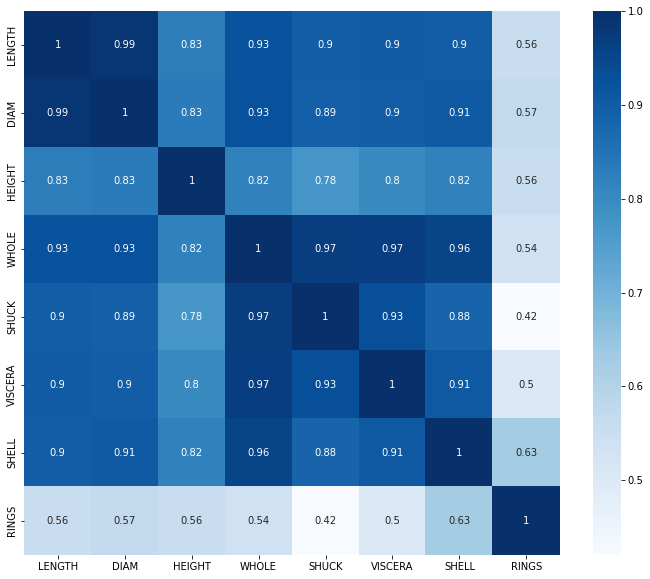

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(dfDataset.corr(), annot=True, cmap='Blues')
plt.show()


Features are highly correlated; length and diameter, length and height, weight. This can lead to multicollinearity.

## Converting categorical columns into numeric  

#### Sex categorical variable of object data type need to be converted to numerical value. So that it is converted to Machine Learning model acceptable format.

*   LableEncoding
*   OneHotEncoding
*   Mapping function



In [12]:
dfDataset['SEX'].value_counts()

M    1528
I    1340
F    1307
Name: SEX, dtype: int64

In [13]:
values = {'M':0, 'F':1, 'I':2}
dfDataset['SEX'] = dfDataset['SEX'].map(values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
dfDataset.head()

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
dfDataset.describe()

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,RINGS
count,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.954970,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.827697,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,2.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Adding Class labels

In [16]:
dfDataset['AGE'] = dfDataset['RINGS']+1.5
dfDataset.drop('RINGS', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
dfDataset['AGE'].value_counts()

10.5    689
11.5    634
9.5     567
12.5    487
8.5     391
13.5    267
7.5     258
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: AGE, dtype: int64

In [18]:
dfDataset['AGE'].describe()

count    4175.000000
mean       11.435090
std         3.224227
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: AGE, dtype: float64

As per above code, maximum age value is 30.5 and minimum age is 2.5 with average of 11.5 age for Abalones. We need 6 classes for target, thus each 5 years age gap can be considered as 1 age group starting from below age 5, 5 to 10, 10 to 15, 15 to 20, 20 to 25 and 25 and above.

In [19]:

conditions = [
    (dfDataset['AGE'] < 5),
    (dfDataset['AGE'] >= 5) & (dfDataset['AGE'] < 10),
    (dfDataset['AGE'] >= 10) & (dfDataset['AGE'] < 15),
    (dfDataset['AGE'] >= 15) & (dfDataset['AGE'] < 20),
    (dfDataset['AGE'] >= 20) & (dfDataset['AGE'] < 25),
    (dfDataset['AGE'] >= 25)
]

values = [1,2,3,4,5,6]

dfDataset['CLASS'] = np.select(conditions, values)

dfDataset.drop('AGE', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
dfDataset["CLASS"].value_counts()

3    2280
2    1388
4     396
5      87
1      17
6       7
Name: CLASS, dtype: int64

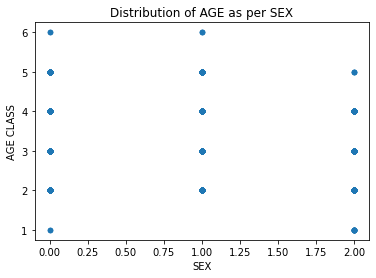

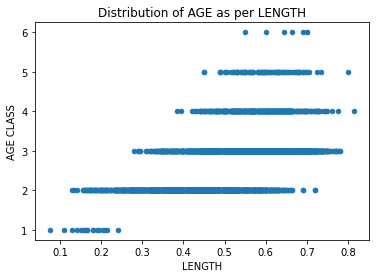

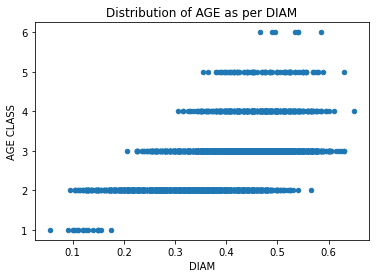

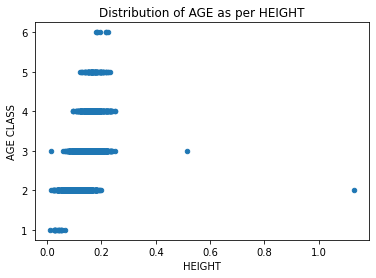

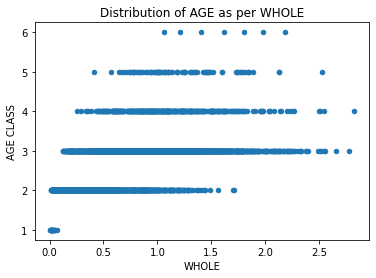

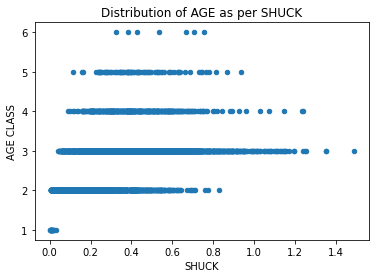

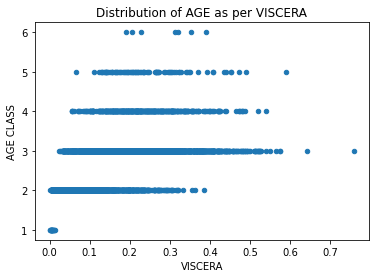

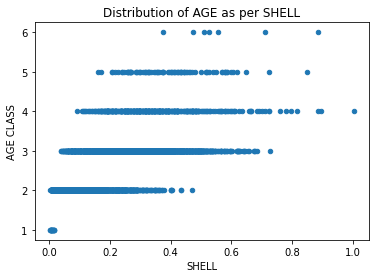

In [21]:
features = ["SEX",	"LENGTH",	"DIAM",	"HEIGHT",	"WHOLE",	"SHUCK", "VISCERA", "SHELL"]
for i in range(0,8):
  dfDataset.plot(kind = 'scatter', x=features[i], y='CLASS')
  plt.xlabel(features[i]) 
  plt.ylabel('AGE CLASS') 
  plt.title('Distribution of AGE as per '+features[i])
  plt.show()

From scatter plots it is clear that most of the AGE CLASSES fall between range 2 and 3 that is from years age 5 to 15 years.

Also we can see some very clear outliers in Height, which is leading to increased overall mean height. We can remove these outliers in height.

In [22]:
dfDataset = dfDataset[dfDataset.HEIGHT < 0.4]

In [23]:
dfDataset.shape

(4173, 9)

## Define features and labels

In [24]:
dfDataset

,SEX,LENGTH,DIAM,HEIGHT,WHOLE,SHUCK,VISCERA,SHELL,CLASS
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,4
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,3
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,3
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,3
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,3
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,3
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,3


In [25]:
#Data contains 8 feature variables and 1 target variable AGE CLASS
# Define features and labels


In [26]:
y=dfDataset["CLASS"].values


In [27]:
dfDataset = dfDataset.drop('CLASS', axis = 1)

In [28]:
x = dfDataset.values
x

array([[0.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [0.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

# **Question1**

1. Create a custom logistic regression model using the following dataset


a) Split the dataset into training and test dataset 80:20

b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

c) Predict the age category using test dataset, and provide some insights

d) Show the predicted output, and loss function output plots, and explain the outcome

e) Calculate the Confusion matrix and explain the model accuracy




## a) Split the dataset into training and test dataset 80:20

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [30]:
Xtrain.shape

(3338, 8)

In [31]:
Xtest.shape

(835, 8)

In [32]:
Ytrain.shape

(3338,)

In [33]:
Ytest.shape

(835,)

## b) Custom logistic regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

In [34]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

In [35]:
lr = MultiClassLogisticRegression(threshold=1e-5)
lr.fit(Xtrain,Ytrain,lr=0.0001)
print("Training Accuracy is ")
print(lr.score(Xtrain, Ytrain))

Training Accuracy is 
0.703


## c) Predict the age category using test dataset, and provide some insights

In [36]:
Ypred = lr.predict_classes(Xtest)

In [37]:
np.unique(Ypred)

array([2, 3])

In [38]:
np.unique(Ytest)

array([1, 2, 3, 4, 5])

As per the model output the number of classes is reduced and the maximum occuraing AGE CLASSES 2, 3 and 4 are obtained. This classifier could not distinguish among classes 1 and 5 as shown in Ytest. 

To improve accuracy and get classification for all AGE CLASSES, we can plot distribution of each of the 8 features. For continuous features histplots and for categorical features barplots. These distribution can analysed individually as well as with feature- AGE CLASS pairplots. To understand which feature has strong effect on AGE CLASS target variable.

Furtheremore the Model Feature selection methods can be used to identify those important features and rebuild model using only them.

Also to understand impact of multicollinearity the features like AGE and Rings can be removed from dataset and then model is trained. This is beacuse in future dataset the values of Rings will not be there and it is the target variable. Thus to avoid overfitting due to multicollinearity when independent variables like Rings and age are highly correlated to each other. It makes it hard to interpret the model.

The categorical feature Sex is dropped as it is not affecting age.

## d) Show the predicted output, and loss function output plots, and explain the outcome

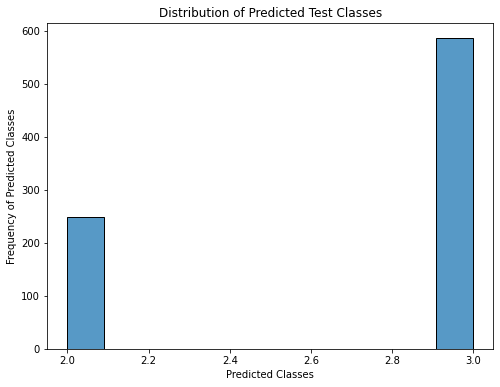

In [39]:
plt.figure(figsize=(8,6))
sns.histplot(Ypred)
plt.title("Distribution of Predicted Test Classes")
plt.ylabel("Frequency of Predicted Classes")
plt.xlabel("Predicted Classes")
plt.show()

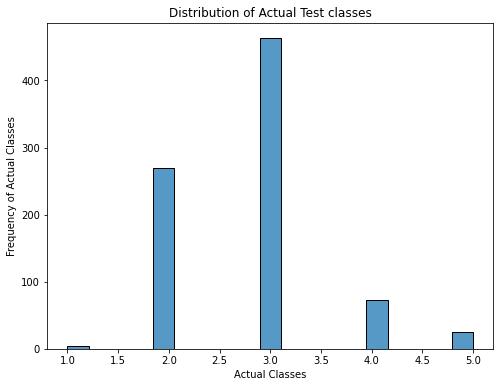

In [40]:
 plt.figure(figsize=(8,6))
 sns.histplot(Ytest)
 plt.title("Distribution of Actual Test classes")
 plt.ylabel("Frequency of Actual Classes")
 plt.xlabel("Actual Classes")
 plt.show()

It is clear from the plots that model correctly classified for Classes 2 and 3. But the lesser commmon classes like 5 and 1 could not be distinguished.

### Plotting the loss function

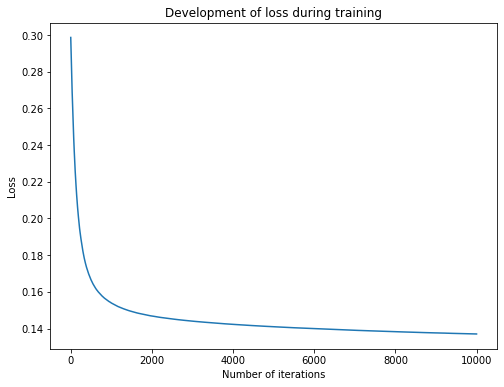

In [41]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

As epochs approach 2000 the cost funtion is minimized and graph is constant after that

## e) Calculate the Confusion matrix and explain the model accuracy

In [42]:
df_confusion_matrix = pd.crosstab(Ypred, Ytest)

In [43]:
df_confusion_matrix

col_0,1,2,3,4,5
row_0,,,,,
2,4,175,65,5,0
3,0,95,398,68,25


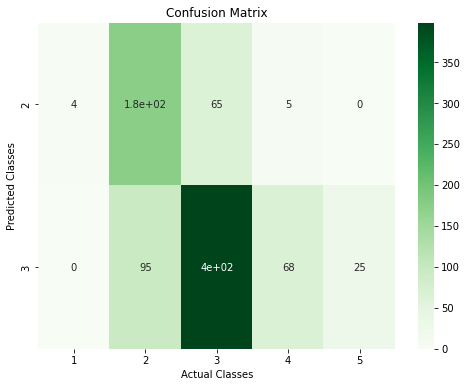

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion_matrix, annot=True, cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

From the matrix it is clear that class 2 and 3 are almost correctly predicted. The smaller valued classes like class 1 and 5 were falsely predicted as class 2 and 3 respectively. For class 4 the maximum values are predicted as class 3.

Finding classwise scores for class 2

In [45]:
TP = df_confusion_matrix.iloc[0,1]
FP = df_confusion_matrix.iloc[0,:].sum()- TP
FN = df_confusion_matrix.iloc[:,1].sum()- TP
TN = df_confusion_matrix.sum().sum() - TP - FP - FN


Accuracy for class 2

In [46]:
Accuracy = (TP+TN) / df_confusion_matrix.sum().sum()
Accuracy

0.7976047904191617

Precision

In [47]:
Precision = TP/ (TP + FP)
Precision

0.7028112449799196

Recall

In [48]:
Recall = TP/ (TP + FN)
Recall

0.6481481481481481

F1-Score

In [49]:
F1_score = (2 * Precision * Recall) /(Precision + Recall)
F1_score

0.6743737957610789

It is concluded that model overall accuracy for class 2 is 80 %. Class two is only 20% times falsely classified.

In [50]:
# Accuracy overall for Test Dataset
print(lr.score(Xtest, Ytest))

0.686


From analysis it is clear that the model accuracy for training and testing both is approx 70 percent


# **Question2**



2. Perform Principal component Analysis for the same dataset 

a) Show top 3 of the PCA component output

b) Plot the PCA 1, PCA 2 , and PCA2 components

c) Could you use PCA component for logistic regression? 

In [51]:
### PCA component
class PCA:
    """
     Implement the PCA from scratch
    """
    def __init__(self, n_components):
        """
         Constructor for PCA class

        Args:
            n_components (_type_): _description_
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model

        Args:
            X (_type_): _description_
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

## a) Show top 3 of the PCA component output

In [52]:
# Project the data onto the 3 primary principal components
pca = PCA(3)
pca.fit(Xtrain)
X_projected = pca.transform(Xtrain)

print("Shape of X:", Xtrain.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]

Shape of X: (3338, 8)
Shape of transformed X: (3338, 3)


Transformed 8 feature variables into 3 components with highest variance as per asked.

## b) Plot the PCA 1, PCA 2 , and PCA2 components

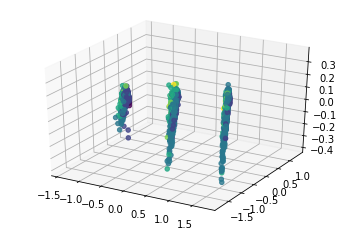

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
ax.scatter3D(x1, x2, x3, c=Ytrain, alpha= 0.8, cmap=plt.cm.get_cmap("viridis", 6))
plt.show()

## c) Could you use PCA component for logistic regression?

Yes. In statistics PCA is used to indentify the coefficients for Regression analysis. This is called Principal component regression (PCR) a regression analysis technique that is based on principal component analysis (PCA). This analysis leads to better predictions as per wikipedia articles :

One major use of PCR lies in overcoming the multicollinearity problem which arises when two or more of the explanatory variables are close to being collinear. PCR can aptly deal with such situations by excluding some of the low-variance principal components in the regression step. In addition, by usually regressing on only a subset of all the principal components, PCR can result in dimension reduction through substantially lowering the effective number of parameters characterizing the underlying model. This can be particularly useful in settings with high-dimensional covariates. Also, through appropriate selection of the principal components to be used for regression, PCR can lead to efficient prediction of the outcome based on the assumed model.

